Found 4568 images in 'elephants'
Found 4607 images in 'others'
Found 7341 images belonging to 2 classes.
Found 1834 images belonging to 2 classes.
Class Indices: {'elephants': 0, 'others': 1}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


229/229 ━━━━━━━━━━━━━━━━━━━━ 3349s 10s/step - accuracy: 0.8913 - loss: 0.2495 - val_accuracy: 0.9550 - val_loss: 0.1098
Epoch 2/20
  1/229 ━━━━━━━━━━━━━━━━━━━━ 8:40 2s/step - accuracy: 1.0000 - loss: 0.0709

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 0.0709 - val_accuracy: 1.0000 - val_loss: 0.0476
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1189s 5s/step - accuracy: 0.9590 - loss: 0.1068 - val_accuracy: 0.9561 - val_loss: 0.1056
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0475 - val_accuracy: 0.9000 - val_loss: 0.1791
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1151s 5s/step - accuracy: 0.9680 - loss: 0.0844 - val_accuracy: 0.9693 - val_loss: 0.0797
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9688 - loss: 0.0831 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1158s 5s/step - accuracy: 0.9765 - loss: 0.0656 - val_accuracy: 0.9742 - val_loss: 0.0724
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 9/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1149s 5s/step - accuracy: 0.9705 - loss: 0.0773 - val_accuracy: 0.954

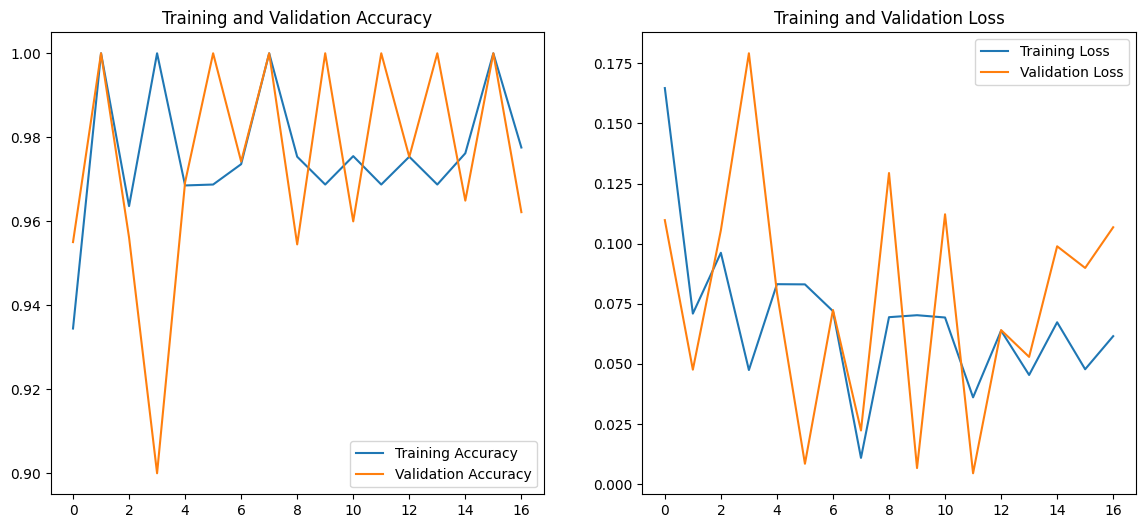

Model saved as 'elephant_classifier_model.h5' in Google Drive.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import logging
import numpy as np
import random

logging.getLogger('tensorflow').setLevel(logging.ERROR)

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

DATASET_DIR = '/content/drive/MyDrive/dataset'

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20
VALIDATION_SPLIT = 0.2
NUM_CLASSES = 1

classes = ['elephants', 'others']
for cls in classes:
    cls_path = os.path.join(DATASET_DIR, cls)
    if not os.path.isdir(cls_path):
        raise ValueError(f"Class directory '{cls_path}' does not exist. Please check the directory structure.")
    num_images = len([name for name in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, name))])
    print(f"Found {num_images} images in '{cls}'")

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=VALIDATION_SPLIT
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT
)

# training generator
train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=SEED
)

# validation generator
validation_generator = validation_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed=SEED
)

print("Class Indices:", train_generator.class_indices)

base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # Freeze the base model

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(NUM_CLASSES, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stop, checkpoint]
)

loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss_hist = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_hist, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

model.save('/content/drive/MyDrive/elephant_classifier_model.keras')
print("Model saved as 'elephant_classifier_model.h5' in Google Drive.")


In [ ]:
MODEL_PATH = '/content/drive/MyDrive/elephant_classifier_model.keras'

model = tf.keras.models.load_model(MODEL_PATH)

class_names = ['elephants', 'others']

def predict_image_class(img_path):

    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    probability = prediction[0][0]

    if probability > 0.5:
        predicted_class = class_names[1]
    else:
        predicted_class = class_names[0]

    return predicted_class, probability
